<font size="5"> CS6364/CS4364: Assignment 2</font><br>
<font size="5"> Part: 2 </font><br>
<font size="5"> Myocardial infarction complications </font><br>
<font size="4"> Sagar Sheth </font>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc, ConfusionMatrixDisplay


In [111]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
#print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 


              name     role         type demographic  \
0               ID       ID      Integer        None   
1              AGE  Feature      Integer         Age   
2              SEX  Feature       Binary         Sex   
3         INF_ANAM  Feature  Categorical        None   
4        STENOK_AN  Feature  Categorical        None   
5        FK_STENOK  Feature  Categorical        None   
6         IBS_POST  Feature  Categorical        None   
7         IBS_NASL  Feature       Binary        None   
8               GB  Feature  Categorical        None   
9       SIM_GIPERT  Feature       Binary        None   
10         DLIT_AG  Feature  Categorical        None   
11           ZSN_A  Feature  Categorical        None   
12           nr_11  Feature       Binary        None   
13           nr_01  Feature       Binary        None   
14           nr_02  Feature       Binary        None   
15           nr_03  Feature       Binary        None   
16           nr_04  Feature       Binary        

In [112]:
print('Column Names:')
print(X.dtypes)

Column Names:
AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K_SH_POST        float64
MP_TP_POST 

In [113]:
y=y['ZSN']


Text(0, 0.5, 'Value')

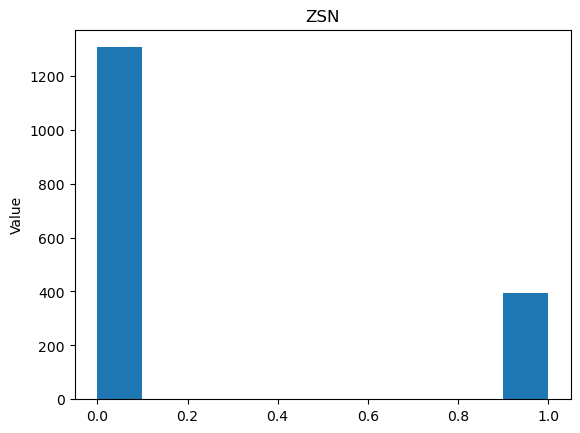

In [114]:
plt.hist(y)
plt.title('ZSN')
plt.ylabel('Value')

In [115]:
pd.set_option('display.max_rows', None)
null_values=X.isnull().sum()
null_values


AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im             80
inf_im    

<font size="4">Getting Column whos count of null values is greater than ~10% of the data.</font></br>
<font size="4">We will Drop these columns.</font>

In [116]:
column_null=null_values.index[null_values.gt(150)]
column_null

Index(['IBS_NASL', 'DLIT_AG', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
       'D_AD_ORIT', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
       'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'GIPO_K', 'K_BLOOD',
       'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'ROE',
       'NA_KB', 'NOT_NA_KB', 'LID_KB'],
      dtype='object')

In [117]:
X_dropped=X.drop(columns=column_null, axis=1)

In [118]:
print('Column Names:')
X_dropped.dtypes

Column Names:


AGE             float64
SEX               int64
INF_ANAM        float64
STENOK_AN       float64
FK_STENOK       float64
IBS_POST        float64
GB              float64
SIM_GIPERT      float64
ZSN_A           float64
nr_11           float64
nr_01           float64
nr_02           float64
nr_03           float64
nr_04           float64
nr_07           float64
nr_08           float64
np_01           float64
np_04           float64
np_05           float64
np_07           float64
np_08           float64
np_09           float64
np_10           float64
endocr_01       float64
endocr_02       float64
endocr_03       float64
zab_leg_01      float64
zab_leg_02      float64
zab_leg_03      float64
zab_leg_04      float64
zab_leg_06      float64
O_L_POST        float64
K_SH_POST       float64
MP_TP_POST      float64
SVT_POST        float64
GT_POST         float64
FIB_G_POST      float64
ant_im          float64
lat_im          float64
inf_im          float64
post_im         float64
IM_PG_P         

In [119]:
pd.reset_option('display.max_rows')
for column in X_dropped.columns:
    value_counts = X_dropped[column].value_counts()
    null_counts = X_dropped[column].isnull().sum()
    print(f"Value counts for {column}:")
    print(value_counts)
    print("Null Count:", null_counts)
    print('mean is :',X_dropped[column].mean())
    print('mode is :',X_dropped[column].mode().iloc[0])
    print('median is :',X_dropped[column].median())
    print("\n")
    

Value counts for AGE:
63.0    90
65.0    81
62.0    79
64.0    68
70.0    66
        ..
86.0     2
92.0     2
90.0     2
30.0     1
26.0     1
Name: AGE, Length: 62, dtype: int64
Null Count: 8
mean is : 61.856973995271865
mode is : 63.0
median is : 63.0


Value counts for SEX:
1    1065
0     635
Name: SEX, dtype: int64
Null Count: 0
mean is : 0.6264705882352941
mode is : 1
median is : 1.0


Value counts for INF_ANAM:
0.0    1060
1.0     410
2.0     147
3.0      79
Name: INF_ANAM, dtype: int64
Null Count: 4
mean is : 0.5548349056603774
mode is : 0.0
median is : 0.0


Value counts for STENOK_AN:
0.0    661
6.0    332
1.0    146
2.0    137
5.0    125
3.0    117
4.0     76
Name: STENOK_AN, dtype: int64
Null Count: 106
mean is : 2.316185696361355
mode is : 0.0
median is : 1.0


Value counts for FK_STENOK:
2.0    854
0.0    661
3.0     54
1.0     47
4.0     11
Name: FK_STENOK, dtype: int64
Null Count: 73
mean is : 1.2052858020897357
mode is : 2.0
median is : 2.0


Value counts for IBS_POST:

Dropping the below columns as the data is extremely skewed to one value and has over 100+ rows of null values</br>
ritm_ecg_p_02</br>
ritm_ecg_p_04</br>
ritm_ecg_p_06</br>
ritm_ecg_p_08</br>
n_r_ecg_p_01 </br>
n_r_ecg_p_02 </br>
n_r_ecg_p_04 </br>
n_r_ecg_p_05 </br>
n_r_ecg_p_06 </br>
n_r_ecg_p_08 </br>
n_r_ecg_p_09 </br>
n_r_ecg_p_10 </br>
n_p_ecg_p_01 </br>
n_p_ecg_p_03 </br>
n_p_ecg_p_04 </br>
n_p_ecg_p_05 </br>
n_p_ecg_p_06 </br>
n_p_ecg_p_08 </br>
n_p_ecg_p_09 </br>
n_p_ecg_p_10 </br>
n_p_ecg_p_11 </br>
n_p_ecg_p_12 </br>

In [120]:
pd.reset_option('display.max_rows')
columns_to_drop = ['n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
                   'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']

# Drop the specified columns
X_dropped2 = X_dropped.drop(columns=columns_to_drop, axis=1)
X_dropped2

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,NaN,0.0,...,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0


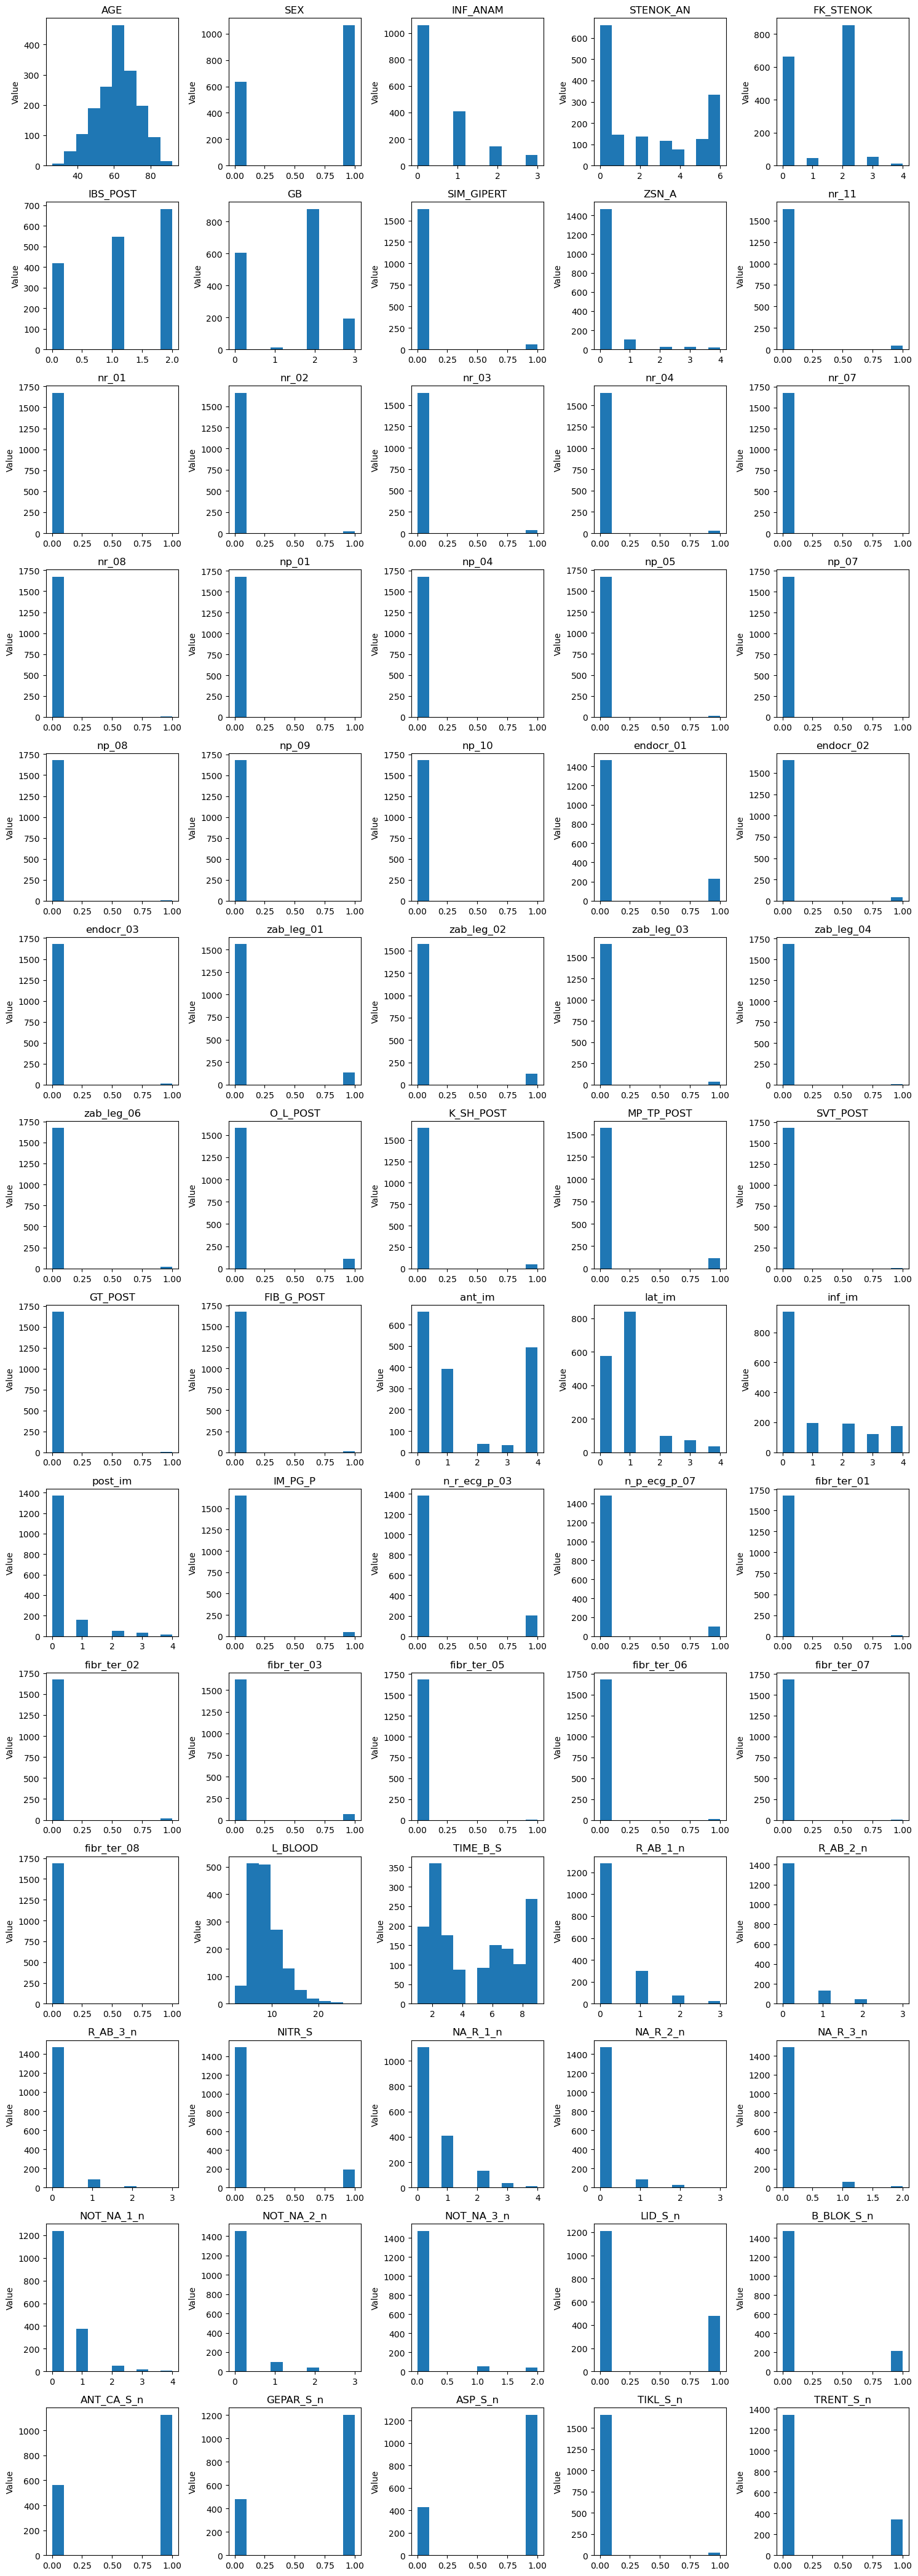

In [121]:
# Set the number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_columns = len(X_dropped2.columns)
num_rows = (num_columns + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 3 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(X_dropped2.columns):
    ax = axes[i]
    ax.hist(X_dropped2[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

# Remove empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

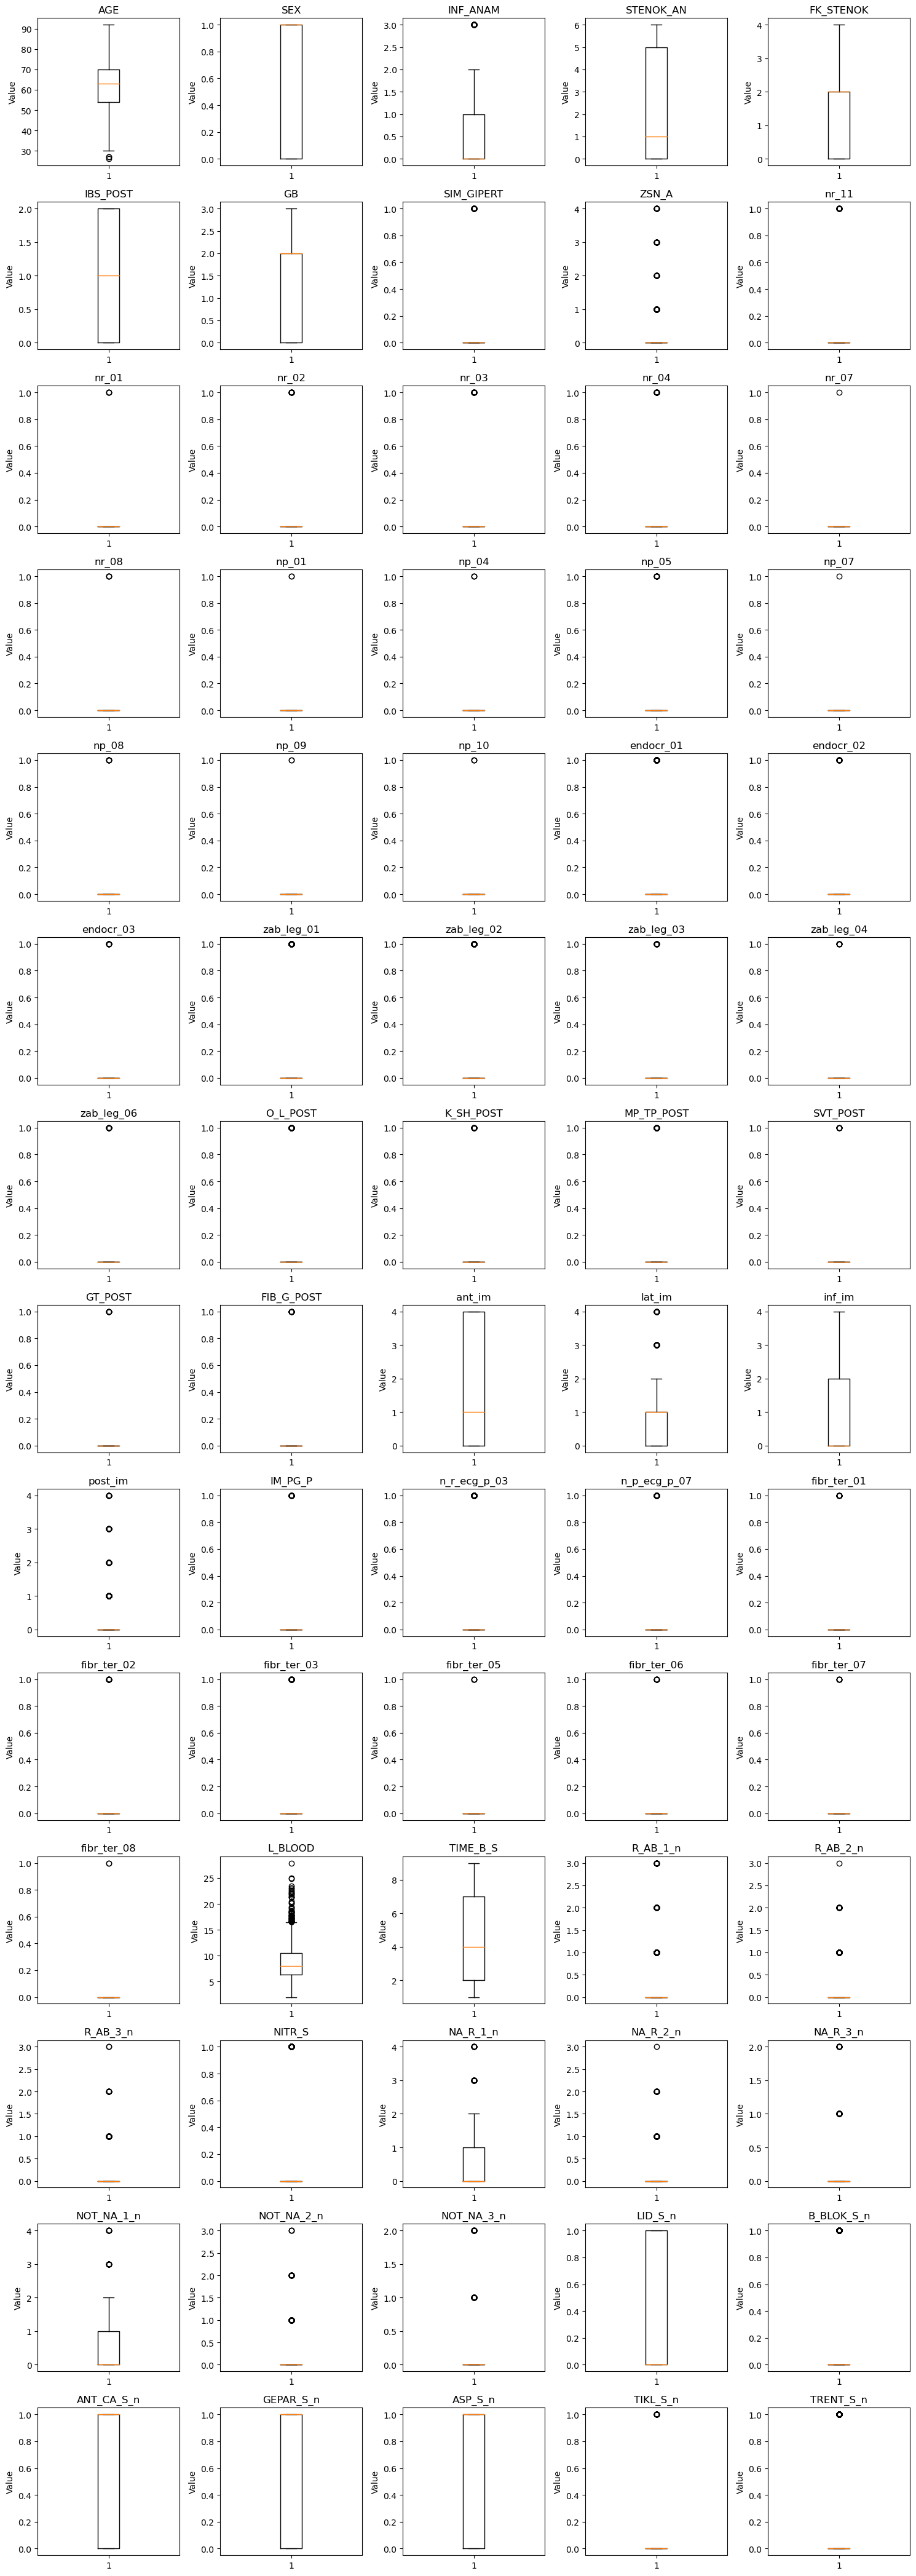

In [122]:
# Set the number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_columns = len(X_dropped2.columns)
num_rows = (num_columns + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 3 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(X_dropped2.columns):
    ax = axes[i]
    ax.boxplot(X_dropped2[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

# Remove empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Dropping the rows with null values

In [123]:
pd.set_option('display.max_rows', None)
null_values=X_dropped2.isnull().sum()
null_values


AGE               8
SEX               0
INF_ANAM          4
STENOK_AN       106
FK_STENOK        73
IBS_POST         51
GB                9
SIM_GIPERT        8
ZSN_A            54
nr_11            21
nr_01            21
nr_02            21
nr_03            21
nr_04            21
nr_07            21
nr_08            21
np_01            18
np_04            18
np_05            18
np_07            18
np_08            18
np_09            18
np_10            18
endocr_01        11
endocr_02        10
endocr_03        10
zab_leg_01        7
zab_leg_02        7
zab_leg_03        7
zab_leg_04        7
zab_leg_06        7
O_L_POST         12
K_SH_POST        15
MP_TP_POST       14
SVT_POST         12
GT_POST          12
FIB_G_POST       12
ant_im           83
lat_im           80
inf_im           80
post_im          72
IM_PG_P           1
n_r_ecg_p_03    115
n_p_ecg_p_07    115
fibr_ter_01      10
fibr_ter_02      10
fibr_ter_03      10
fibr_ter_05      10
fibr_ter_06      10
fibr_ter_07      10


In [124]:
X_dropped_na=X_dropped2.dropna()

In [125]:
pd.reset_option('display.max_rows')
X_dropped_na

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5,64.0,1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,76.0,0,0.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1687,54.0,0,2.0,6.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1690,77.0,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1692,71.0,0,0.0,6.0,2.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


#### More columns wil have to be dropped as after dropping Null rows we are loosing ~600 rows.

In [126]:
null_values=X.isnull().sum()
null_values
column_null=null_values.index[null_values.gt(100)]
column_null
X_dropped3=X.drop(columns=column_null, axis=1)
X_dropped_na=X_dropped3.dropna()
X_dropped_na

,AGE,SEX,INF_ANAM,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,nr_01,...,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,62.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1692,71.0,0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1693,70.0,0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1694,77.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Normalizing the Dataset

In [127]:
normalized_df = (X_dropped_na - X_dropped_na.min()) / (X_dropped_na.max() - X_dropped_na.min())
y_dropped=y.loc[normalized_df.index]
normalized_df

,AGE,SEX,INF_ANAM,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,nr_01,...,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,0.772727,1.0,0.666667,0.25,1.0,1.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.439394,1.0,0.333333,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.25,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.393939,1.0,0.000000,0.00,1.0,0.666667,0.0,0.00,0.0,0.0,...,0.0,0.25,0.75,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.636364,0.0,0.000000,0.00,1.0,0.666667,0.0,0.25,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.515152,1.0,0.000000,0.00,1.0,1.000000,0.0,0.00,0.0,0.0,...,0.0,0.00,0.00,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.545455,1.0,0.000000,0.00,0.0,0.000000,1.0,0.00,0.0,0.0,...,0.0,0.25,0.50,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1692,0.681818,0.0,0.000000,0.50,1.0,0.666667,0.0,0.00,0.0,0.0,...,0.0,0.25,0.25,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1693,0.666667,0.0,0.000000,0.50,0.5,0.666667,0.0,0.00,0.0,0.0,...,0.0,0.00,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1694,0.772727,0.0,0.000000,0.00,0.0,0.666667,0.0,0.00,0.0,0.0,...,1.0,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [128]:
normalized_df.dtypes

AGE            float64
SEX            float64
INF_ANAM       float64
FK_STENOK      float64
IBS_POST       float64
GB             float64
SIM_GIPERT     float64
ZSN_A          float64
nr_11          float64
nr_01          float64
nr_02          float64
nr_03          float64
nr_04          float64
nr_07          float64
nr_08          float64
np_01          float64
np_04          float64
np_05          float64
np_07          float64
np_08          float64
np_09          float64
np_10          float64
endocr_01      float64
endocr_02      float64
endocr_03      float64
zab_leg_01     float64
zab_leg_02     float64
zab_leg_03     float64
zab_leg_04     float64
zab_leg_06     float64
O_L_POST       float64
K_SH_POST      float64
MP_TP_POST     float64
SVT_POST       float64
GT_POST        float64
FIB_G_POST     float64
ant_im         float64
lat_im         float64
inf_im         float64
post_im        float64
IM_PG_P        float64
fibr_ter_01    float64
fibr_ter_02    float64
fibr_ter_03

In [129]:
y_dropped

0       0
1       0
2       0
3       1
4       0
       ..
1691    0
1692    0
1693    0
1694    0
1696    0
Name: ZSN, Length: 1436, dtype: int64

Text(0, 0.5, 'Value')

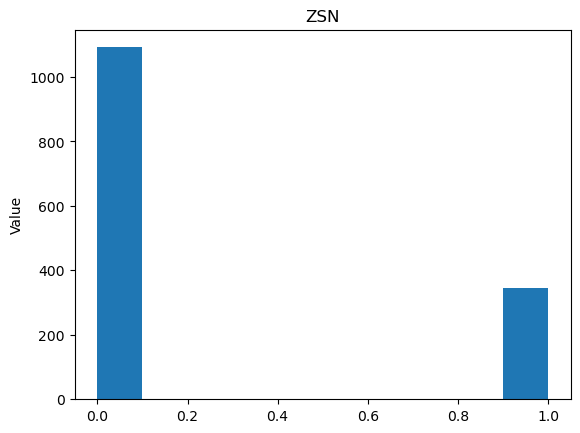

In [130]:
plt.hist(y_dropped)
plt.title('ZSN')
plt.ylabel('Value')

#### Spliting the Data into Train, Test & Holdout

In [131]:
X_train, X_test_temp, y_train, y_test_temp = train_test_split(normalized_df, y_dropped, test_size=0.3, random_state=167)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test_temp, y_test_temp, test_size=0.33, random_state=167)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_holdout = X_holdout.values
y_holdout = y_holdout.values

In [132]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print('X_holdout shape: ',X_holdout.shape)
print('y_holdout shape: ',y_holdout.shape)

X_train shape:  (1005, 59)
y_train shape:  (1005,)
X_test shape:  (288, 59)
y_test shape:  (288,)
X_holdout shape:  (143, 59)
y_holdout shape:  (143,)


#### Calculating psis & phis

In [133]:
n = X_train.shape[0]
d = X_train.shape[1]
K = 2 

psis = np.zeros([K,d])
phis = np.zeros([K])

for k in range(K):
    X_k = X_train[y_train == k]
    psis[k] = np.mean(X_k, axis=0)
    phis[k] = X_k.shape[0] / float(n)

print(phis)

[0.75920398 0.24079602]


#### Predicting values based upon above calc

In [134]:
def nb_predictions(x, psis, phis):
    n, d = x.shape
    
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    # compute log-probabilities
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])


In [135]:
idx, logpyx = nb_predictions(X_train, psis, phis)
print(idx[:10])

[0 0 0 0 0 0 0 0 0 0]


#### Generating Confusion Matrix 

In [136]:
conf_matrix_train = confusion_matrix(y_train, idx)

#### Train Perfomace metrics

In [137]:
print('Train Accuracy:', (idx==y_train).mean())

Train Accuracy: 0.7592039800995025


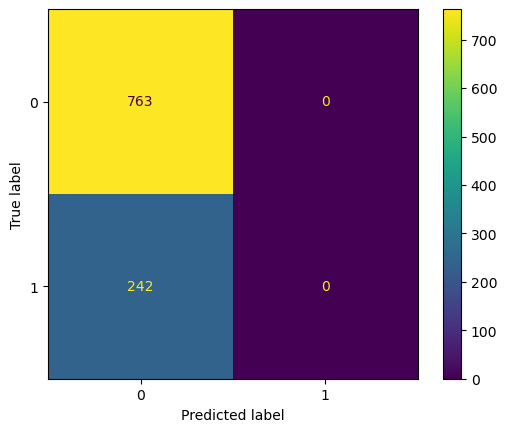

In [138]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train )
disp.plot()

<font size="3">The Model is only predicting one class.</font></br>
Which is not better than baseline therefore we will do feature selection based on correaltion with target variable.

In [139]:
df_corr = pd.concat([normalized_df, y_dropped], axis=1)
correlation_matrix = df_corr.corr()
correlations_with_y = correlation_matrix.iloc[:-1, -1]
print(correlations_with_y[correlations_with_y.abs()>=0.02])

AGE            0.167037
SEX           -0.108422
IBS_POST       0.035376
GB             0.033772
ZSN_A          0.196194
nr_01          0.063208
nr_03          0.027051
nr_04          0.092079
nr_08         -0.025681
np_01          0.022789
np_04         -0.020961
np_08         -0.036356
np_09          0.066538
np_10          0.047033
endocr_01      0.113686
endocr_02      0.030639
zab_leg_01     0.110915
K_SH_POST     -0.036420
MP_TP_POST     0.086885
FIB_G_POST    -0.030599
ant_im         0.076752
lat_im         0.082959
IM_PG_P        0.029448
fibr_ter_06    0.023753
fibr_ter_07   -0.033177
R_AB_1_n       0.050640
NITR_S         0.026053
NA_R_1_n       0.051540
NOT_NA_1_n     0.074535
LID_S_n        0.027158
B_BLOK_S_n    -0.057190
ANT_CA_S_n     0.027252
GEPAR_S_n     -0.048896
TIKL_S_n      -0.045782
TRENT_S_n      0.032638
Name: ZSN, dtype: float64


In [140]:
columns_to_keep=['AGE', 'SEX', 'IBS_POST', 'GB', 'ZSN_A', 'nr_01', 'nr_03', 'nr_04', 'nr_08', 'np_01', 'np_04', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'zab_leg_01', 'K_SH_POST', 'MP_TP_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'IM_PG_P', 'fibr_ter_06', 'fibr_ter_07', 'R_AB_1_n', 'NITR_S', 'NA_R_1_n', 'NOT_NA_1_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'TIKL_S_n', 'TRENT_S_n']
#columns_to_keep=['AGE', 'SEX', 'ZSN_A', 'nr_01', 'nr_04', 'np_09', 'endocr_01', 'zab_leg_01', 'MP_TP_POST', 'ant_im', 'lat_im', 'NOT_NA_1_n']
new_X=X[columns_to_keep]
pd.set_option('display.max_rows', None)
null_values=new_X.isnull().sum()
null_values


AGE             8
SEX             0
IBS_POST       51
GB              9
ZSN_A          54
nr_01          21
nr_03          21
nr_04          21
nr_08          21
np_01          18
np_04          18
np_08          18
np_09          18
np_10          18
endocr_01      11
endocr_02      10
zab_leg_01      7
K_SH_POST      15
MP_TP_POST     14
FIB_G_POST     12
ant_im         83
lat_im         80
IM_PG_P         1
fibr_ter_06    10
fibr_ter_07    10
R_AB_1_n       16
NITR_S          9
NA_R_1_n        5
NOT_NA_1_n     10
LID_S_n        10
B_BLOK_S_n     11
ANT_CA_S_n     13
GEPAR_S_n      17
TIKL_S_n       16
TRENT_S_n      16
dtype: int64

#### Dropping Null Rows

In [141]:
pd.reset_option('display.max_rows')
X_dropped_na=new_X.dropna()
X_dropped_na

,AGE,SEX,IBS_POST,GB,ZSN_A,nr_01,nr_03,nr_04,nr_08,np_01,...,R_AB_1_n,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,52.0,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0
3,68.0,0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,60.0,1,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,62.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0
1692,71.0,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1693,70.0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1694,77.0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Normalizaing New Dataset

In [142]:
normalized_df = (X_dropped_na - X_dropped_na.min()) / (X_dropped_na.max() - X_dropped_na.min())
y_dropped=y.loc[normalized_df.index]
normalized_df

,AGE,SEX,IBS_POST,GB,ZSN_A,nr_01,nr_03,nr_04,nr_08,np_01,...,R_AB_1_n,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,TIKL_S_n,TRENT_S_n
0,0.772727,1.0,1.0,1.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,1.0,0.0,0.0,1.0,0.0,0.0
1,0.439394,1.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.25,1.0,0.0,1.0,1.0,0.0,1.0
2,0.393939,1.0,1.0,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.25,0.75,1.0,1.0,0.0,1.0,0.0,0.0
3,0.636364,0.0,1.0,0.666667,0.25,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0
4,0.515152,1.0,1.0,1.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.545455,1.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.25,0.50,1.0,0.0,1.0,1.0,0.0,0.0
1692,0.681818,0.0,1.0,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.25,0.25,0.0,1.0,1.0,1.0,0.0,0.0
1693,0.666667,0.0,0.5,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.25,0.0,0.0,0.0,1.0,0.0,0.0
1694,0.772727,0.0,0.0,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.0,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0


In [143]:
pd.set_option('display.max_rows', None)
null_values=normalized_df.isnull().sum()
null_values

AGE            0
SEX            0
IBS_POST       0
GB             0
ZSN_A          0
nr_01          0
nr_03          0
nr_04          0
nr_08          0
np_01          0
np_04          0
np_08          0
np_09          0
np_10          0
endocr_01      0
endocr_02      0
zab_leg_01     0
K_SH_POST      0
MP_TP_POST     0
FIB_G_POST     0
ant_im         0
lat_im         0
IM_PG_P        0
fibr_ter_06    0
fibr_ter_07    0
R_AB_1_n       0
NITR_S         0
NA_R_1_n       0
NOT_NA_1_n     0
LID_S_n        0
B_BLOK_S_n     0
ANT_CA_S_n     0
GEPAR_S_n      0
TIKL_S_n       0
TRENT_S_n      0
dtype: int64

350

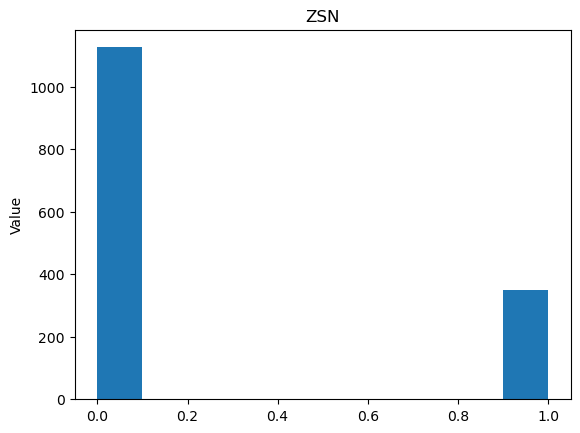

In [144]:
plt.hist(y_dropped)
plt.title('ZSN')
plt.ylabel('Value')
sum(y_dropped)

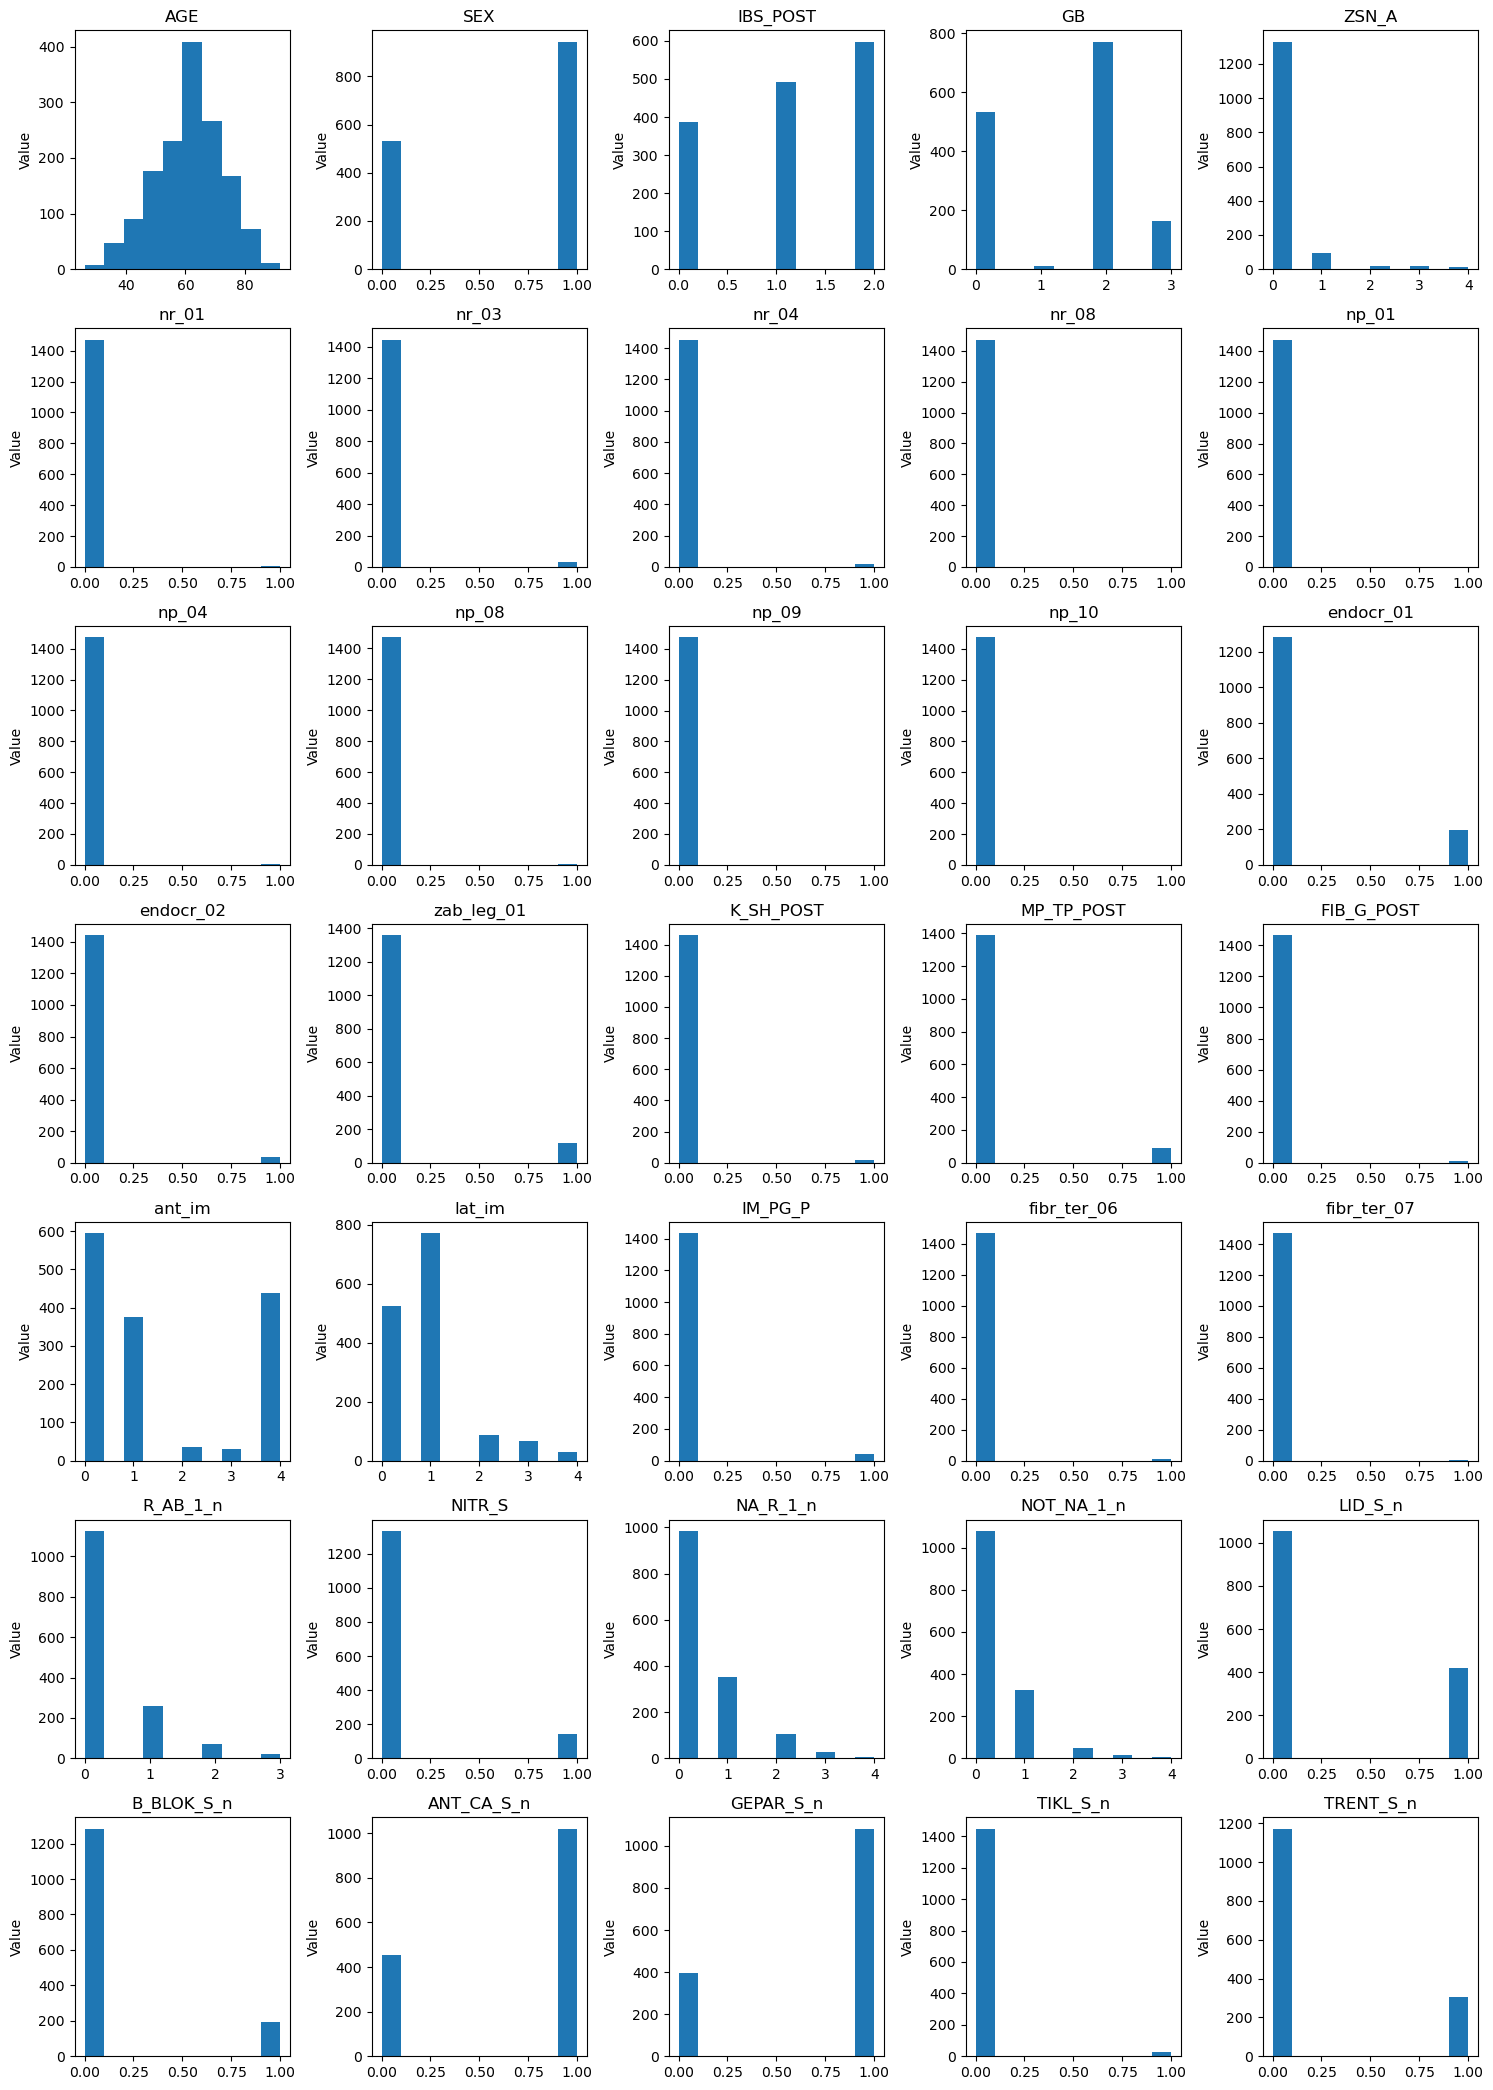

In [145]:
# Set the number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
num_columns = len(X_dropped_na.columns)
num_rows = (num_columns + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 3 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(X_dropped_na.columns):
    ax = axes[i]
    ax.hist(X_dropped_na[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

# Remove empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Splitting into Train, test and Holdout

In [146]:
X_train, X_test_temp, y_train, y_test_temp = train_test_split(normalized_df, y_dropped, test_size=0.3, random_state=167)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test_temp, y_test_temp, test_size=0.33, random_state=167)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_holdout = X_holdout.values
y_holdout = y_holdout.values
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print('X_holdout shape: ',X_holdout.shape)
print('y_holdout shape: ',y_holdout.shape)

X_train shape:  (1033, 35)
y_train shape:  (1033,)
X_test shape:  (296, 35)
y_test shape:  (296,)
X_holdout shape:  (147, 35)
y_holdout shape:  (147,)


#### Calculating psis & phis

In [147]:
n = X_train.shape[0]
d = X_train.shape[1]
K = 2 

psis = np.zeros([K,d])
phis = np.zeros([K])

for k in range(K):
    X_k = X_train[y_train == k]
    psis[k] = np.mean(X_k, axis=0)
    phis[k] = X_k.shape[0] / float(n)

print(phis)

[0.76282672 0.23717328]


#### Predicting values based upon above calc

In [148]:
idx, logpyx = nb_predictions(X_train, psis, phis)
print(idx[:10])

[0 0 0 0 0 0 0 0 0 0]


#### Train Performance metrics

In [149]:
print('Train Accuracy:', (idx==y_train).mean())

Train Accuracy: 0.7676669893514037


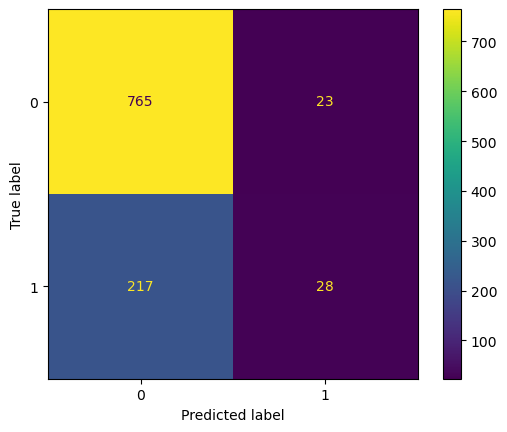

In [150]:
conf_matrix_train = confusion_matrix(y_train, idx)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train )
disp.plot()

In [151]:
print(classification_report(y_train, idx))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       788
           1       0.55      0.11      0.19       245

    accuracy                           0.77      1033
   macro avg       0.66      0.54      0.53      1033
weighted avg       0.72      0.77      0.70      1033



## Test Set

In [152]:
tidx, logpyx = nb_predictions(X_test, psis, phis)
print(idx[:10])

[0 0 0 0 0 0 0 0 0 0]


#### Test Set Performance Metrics

In [153]:
print('Test Accuracy:', (tidx==y_test).mean())

Test Accuracy: 0.7804054054054054


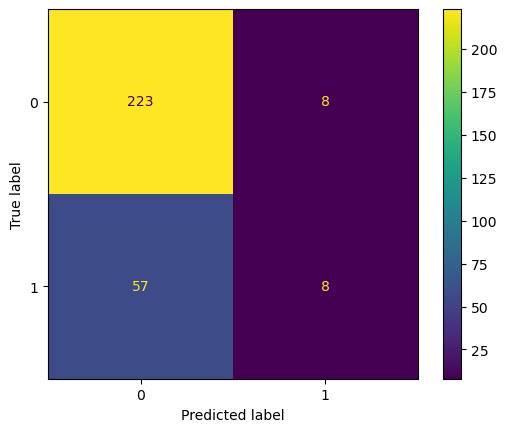

In [154]:
conf_matrix_test = confusion_matrix(y_test, tidx)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test )
disp.plot()

In [155]:
print(classification_report(y_test, tidx))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       231
           1       0.50      0.12      0.20        65

    accuracy                           0.78       296
   macro avg       0.65      0.54      0.54       296
weighted avg       0.73      0.78      0.72       296



## Holdout Set

In [156]:
hidx, logpyx = nb_predictions(X_holdout, psis, phis)
print(idx[:10])

[0 0 0 0 0 0 0 0 0 0]


#### Holdout Set Performance Metrics

In [157]:
print('Holdout Accuracy:', (hidx==y_holdout).mean())

Holdout Accuracy: 0.7619047619047619


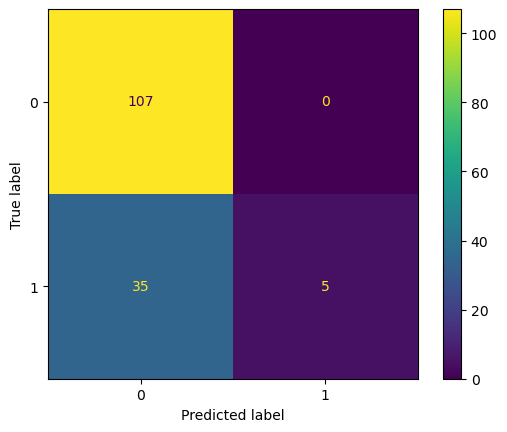

In [158]:
conf_matrix_holdout = confusion_matrix(y_holdout, hidx)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_holdout )
disp.plot()

In [159]:
print(classification_report(y_holdout, hidx))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       107
           1       1.00      0.12      0.22        40

    accuracy                           0.76       147
   macro avg       0.88      0.56      0.54       147
weighted avg       0.82      0.76      0.69       147



## Plotting ROC Curve

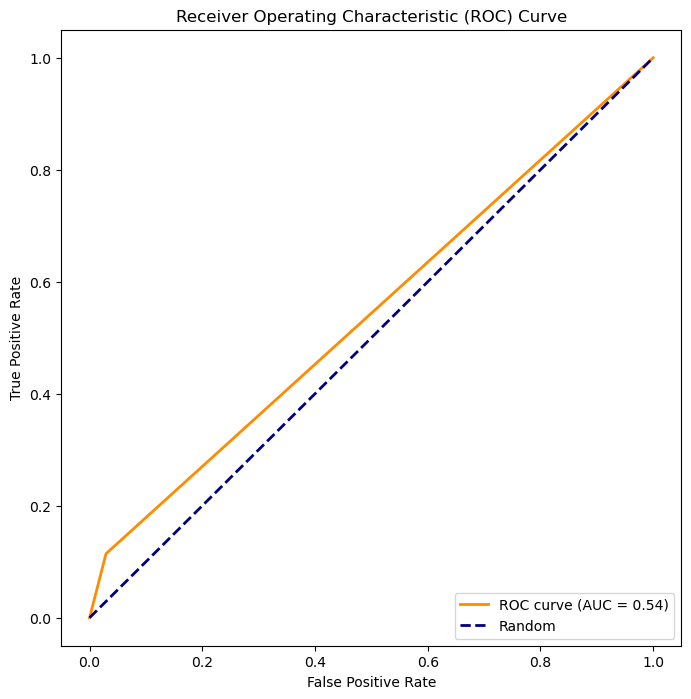

In [161]:
fpr, tpr, thresholds = roc_curve(y_train, idx)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Learing Curve

In [174]:
train_acr=[]
test_acr=[]
holdout_acr=[]
dt=[]
for i in range (50,len(y_train),50):
    train1=X_train[:i,]
    ytrain2=y_train[:i]

    n = train1.shape[0]
    d = train1.shape[1]
    K = 2

    # these are the shapes of the parameters
    psis = np.zeros([K,d])
    phis = np.zeros([K])

    # we now compute the parameters
    for k in range(K):
        X_k = train1[ytrain2 == k]
        psis[k] = np.mean(X_k, axis=0)
        phis[k] = X_k.shape[0] / float(n)
    idx, logpyx = nb_predictions(train1, psis, phis)
    tidx, logpyx = nb_predictions(X_test, psis, phis)
    hidx, logpyx = nb_predictions(X_holdout, psis, phis)
    dt.append(i)
    train_acr.append((idx==ytrain2).mean())
    test_acr.append((tidx==y_test).mean())
    holdout_acr.append((hidx==y_holdout).mean())
    

In [181]:
base_line=np.ones(len(dt))*(sum(y_train)/len(y_train))
base_line=1-base_line

array([0.76282672, 0.76282672, 0.76282672, 0.76282672, 0.76282672,
       0.76282672, 0.76282672, 0.76282672, 0.76282672, 0.76282672,
       0.76282672, 0.76282672, 0.76282672, 0.76282672, 0.76282672,
       0.76282672, 0.76282672, 0.76282672, 0.76282672, 0.76282672])

Text(0.5, 1.0, 'Learning Curve')

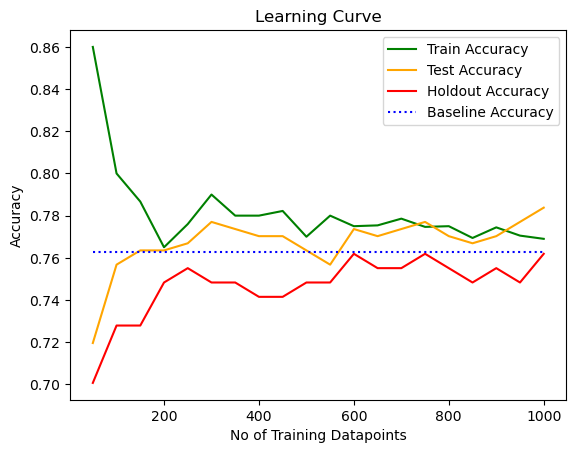

In [185]:
plt.plot(dt,train_acr, color='green', label='Train Accuracy')
plt.plot(dt,test_acr, color='orange', label='Test Accuracy')
plt.plot(dt,holdout_acr, color='red', label='Holdout Accuracy')
plt.plot(dt, base_line, linestyle='dotted', color='b', label='Baseline Accuracy')

plt.legend()
plt.xlabel('No of Training Datapoints')
plt.ylabel('Accuracy')
plt.title('Learning Curve')